In [29]:
%pip install scikit-learn pandas numpy matplotlib seaborn missingno


Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os

In [31]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Read the CSV, skipping the header row
# diabetes_data = pd.read_csv("/content/diabetes-classification/data/raw/pima-indians-diabetes.csv", names=column_names, skiprows=1)
diabetes_data = pd.read_csv("../data/raw/pima-indians-diabetes.csv", names=column_names, skiprows=1)

print(diabetes_data.head())
print(f"\nDataset shape: {diabetes_data.shape}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset shape: (768, 9)


In [32]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()

## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [34]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### To fill these Nan values the data distribution needs to be understood

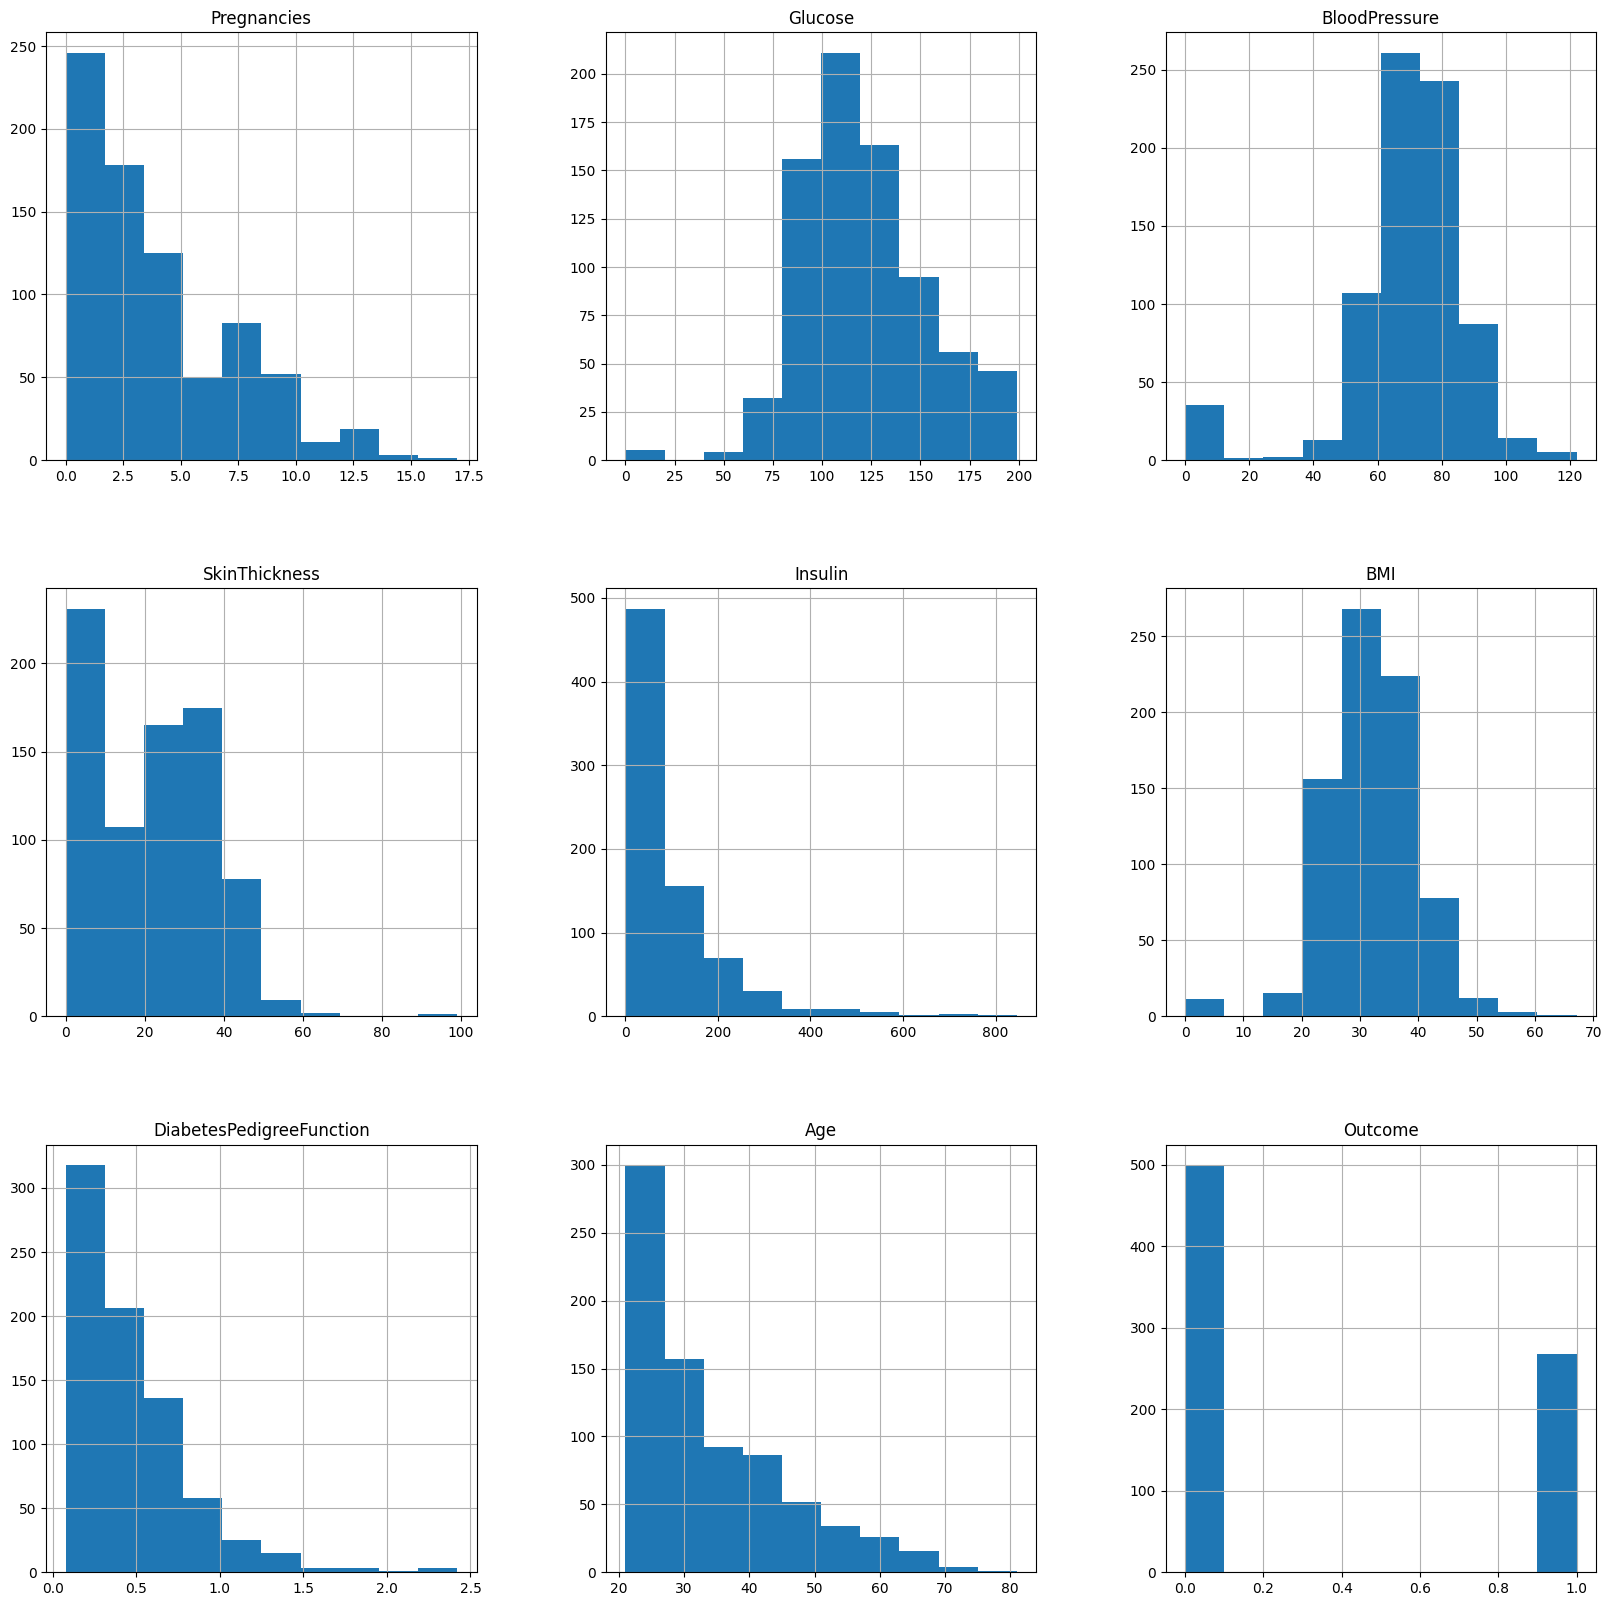

In [35]:
# Plot histograms for each feature
p = diabetes_data.hist(figsize = (20,20))

### Aiming to impute nan values for the columns in accordance with their distribution

In [36]:
# Fill NaN values with mean or median based on distribution


diabetes_data_copy.fillna({'Glucose': diabetes_data_copy['Glucose'].mean()}, inplace=True)
diabetes_data_copy.fillna({'BloodPressure': diabetes_data_copy['BloodPressure'].mean()}, inplace=True)
diabetes_data_copy.fillna({'SkinThickness': diabetes_data_copy['SkinThickness'].median()}, inplace=True)
diabetes_data_copy.fillna({'Insulin': diabetes_data_copy['Insulin'].median()}, inplace=True)
diabetes_data_copy.fillna({'BMI': diabetes_data_copy['BMI'].median()}, inplace=True)

## Plotting after Nan removal

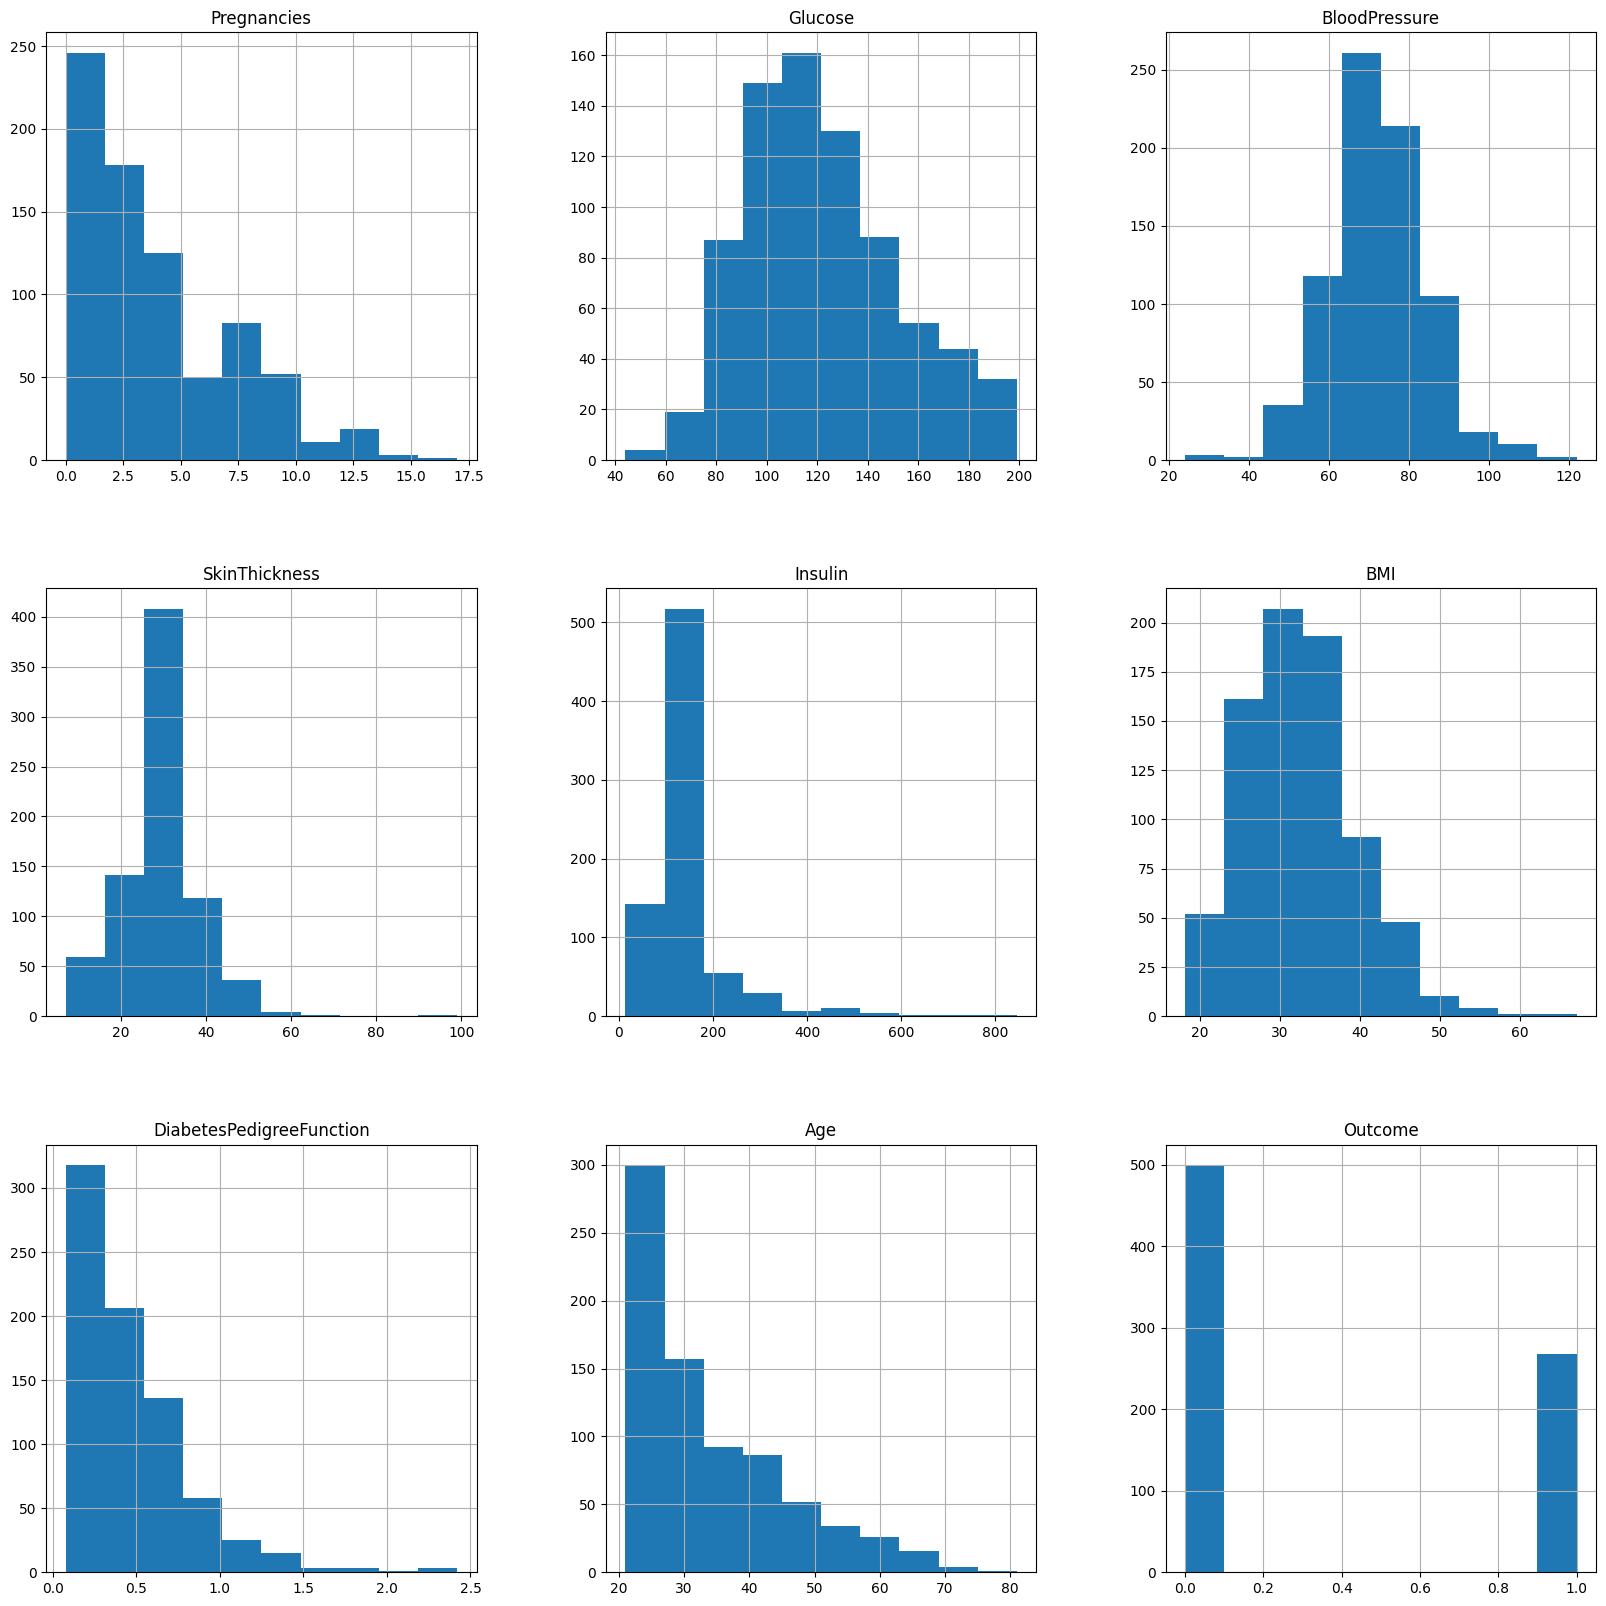

In [37]:
p = diabetes_data_copy.hist(figsize = (20,20))

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


#### to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [38]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

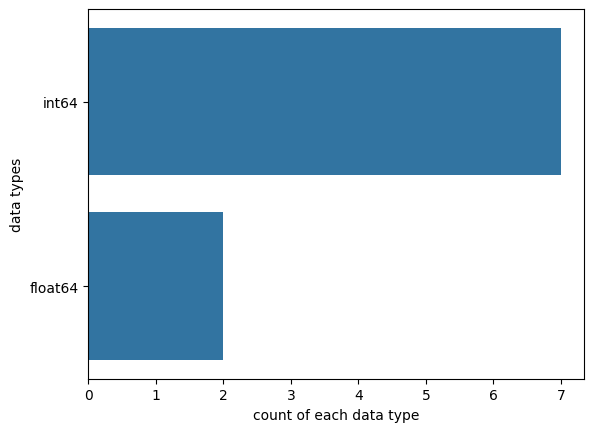

In [39]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

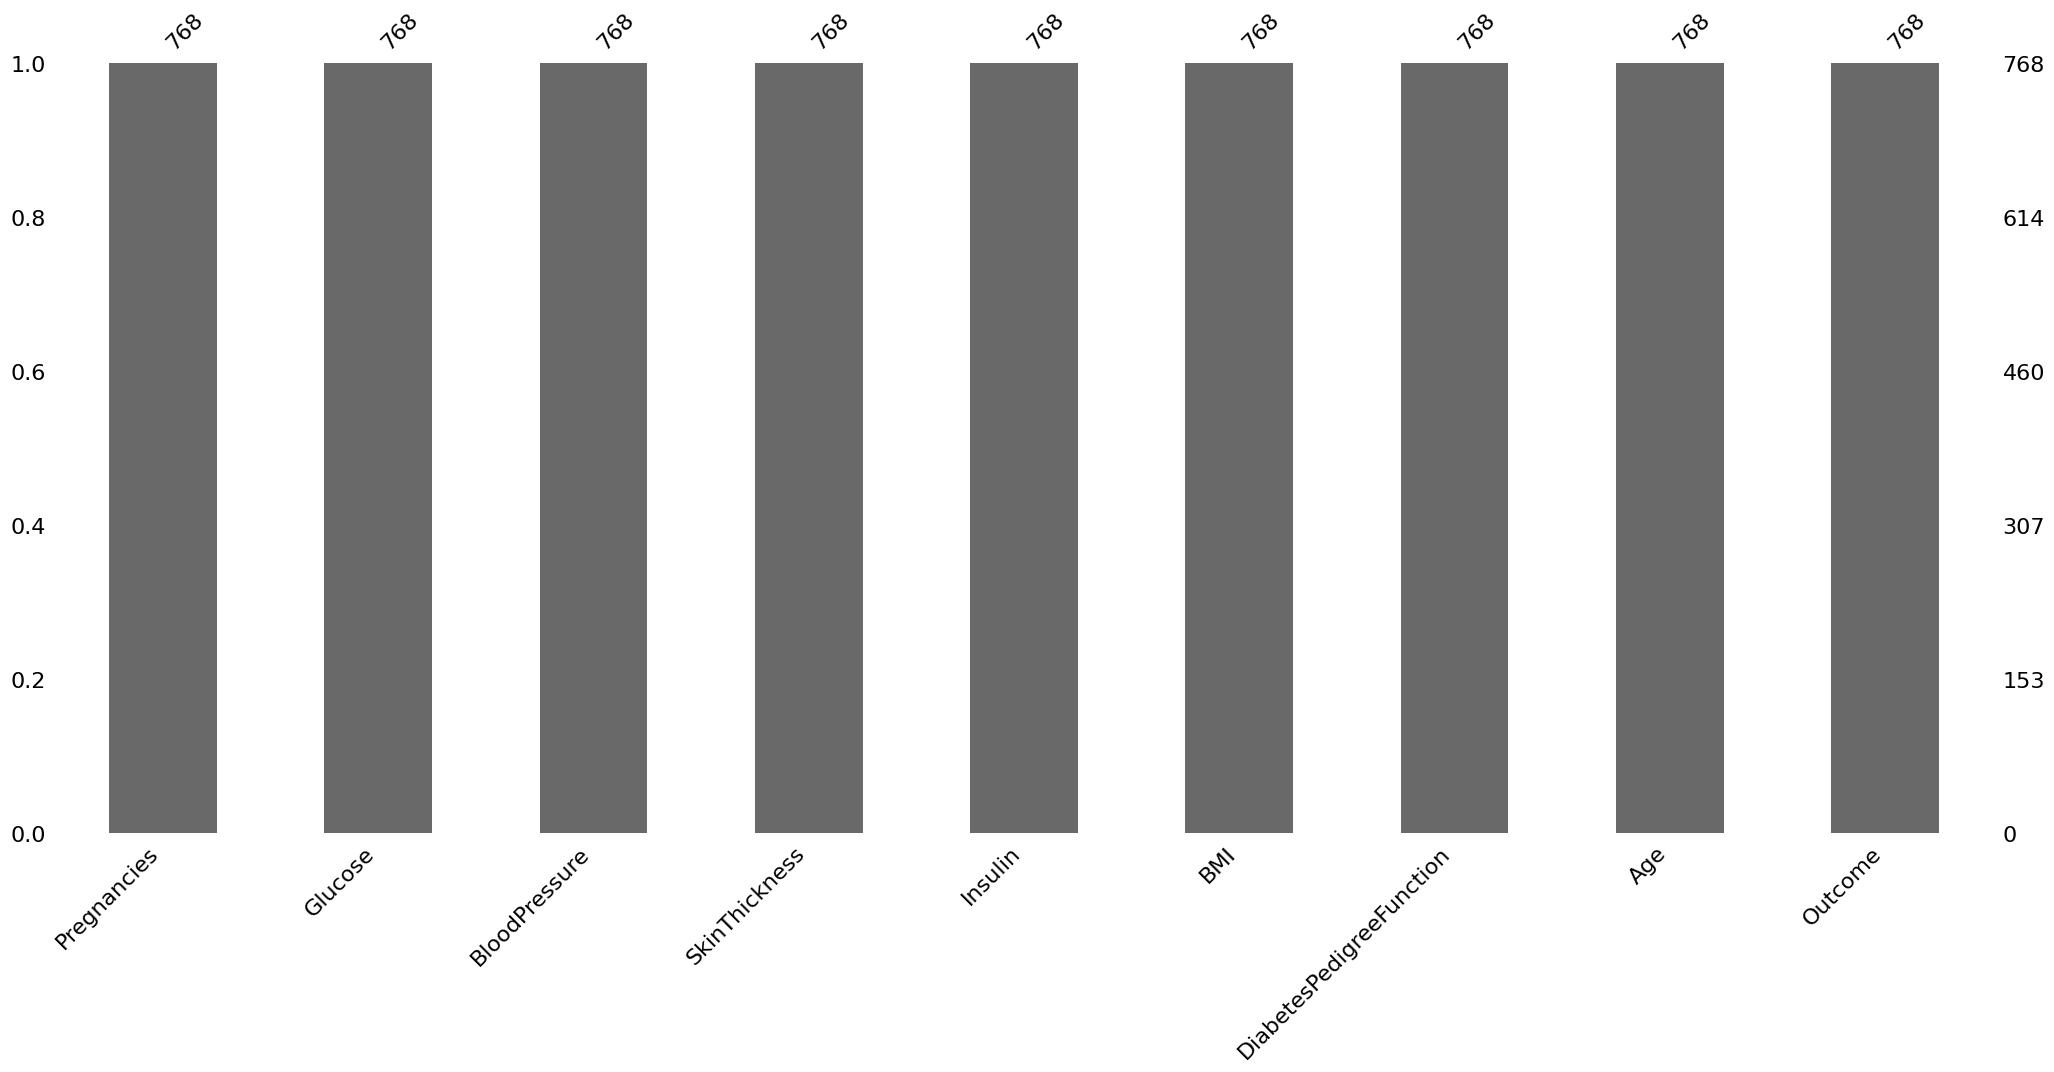

In [40]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)


Outcome
0    500
1    268
Name: count, dtype: int64


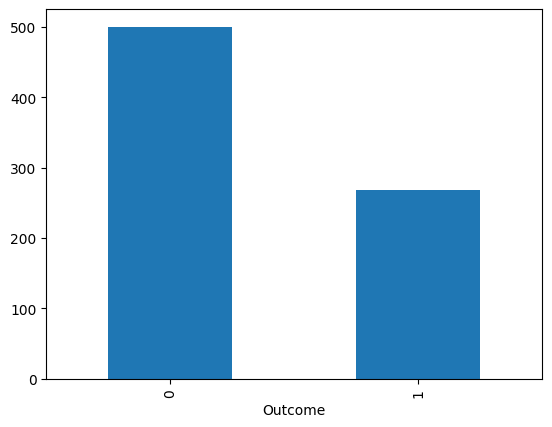

In [41]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of uncleaned data

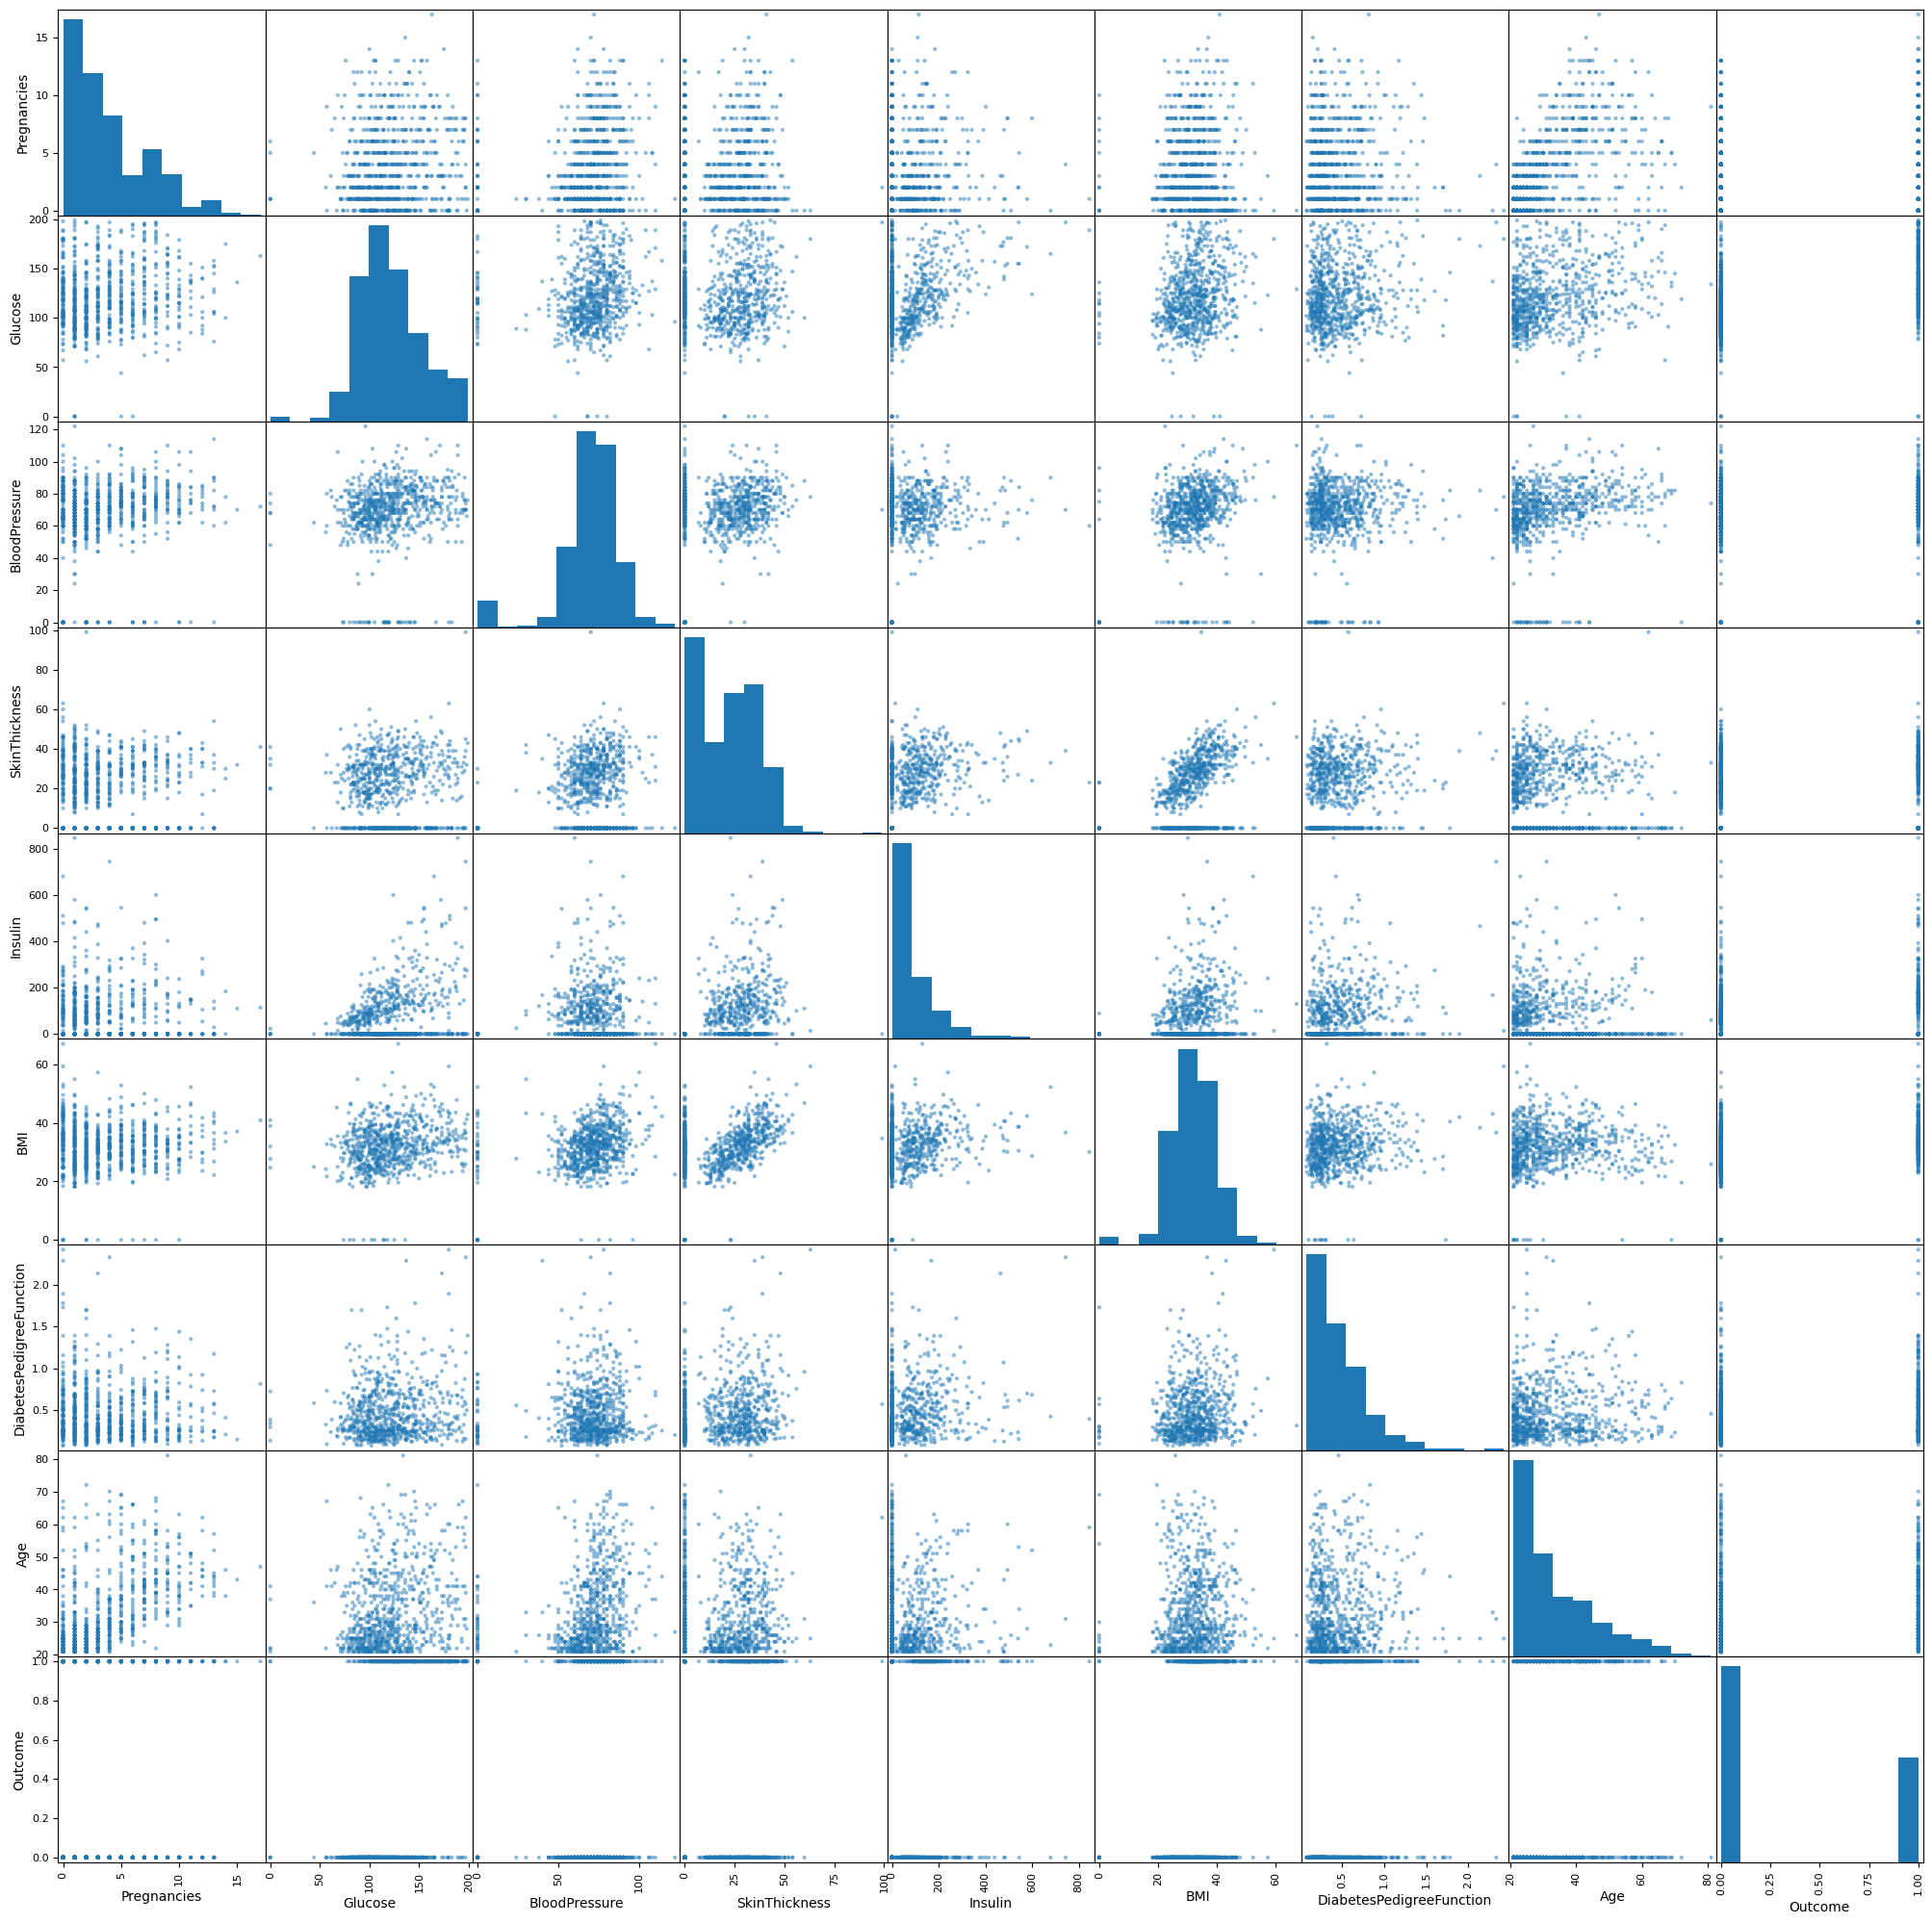

In [42]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

#### Pair plot for clean data

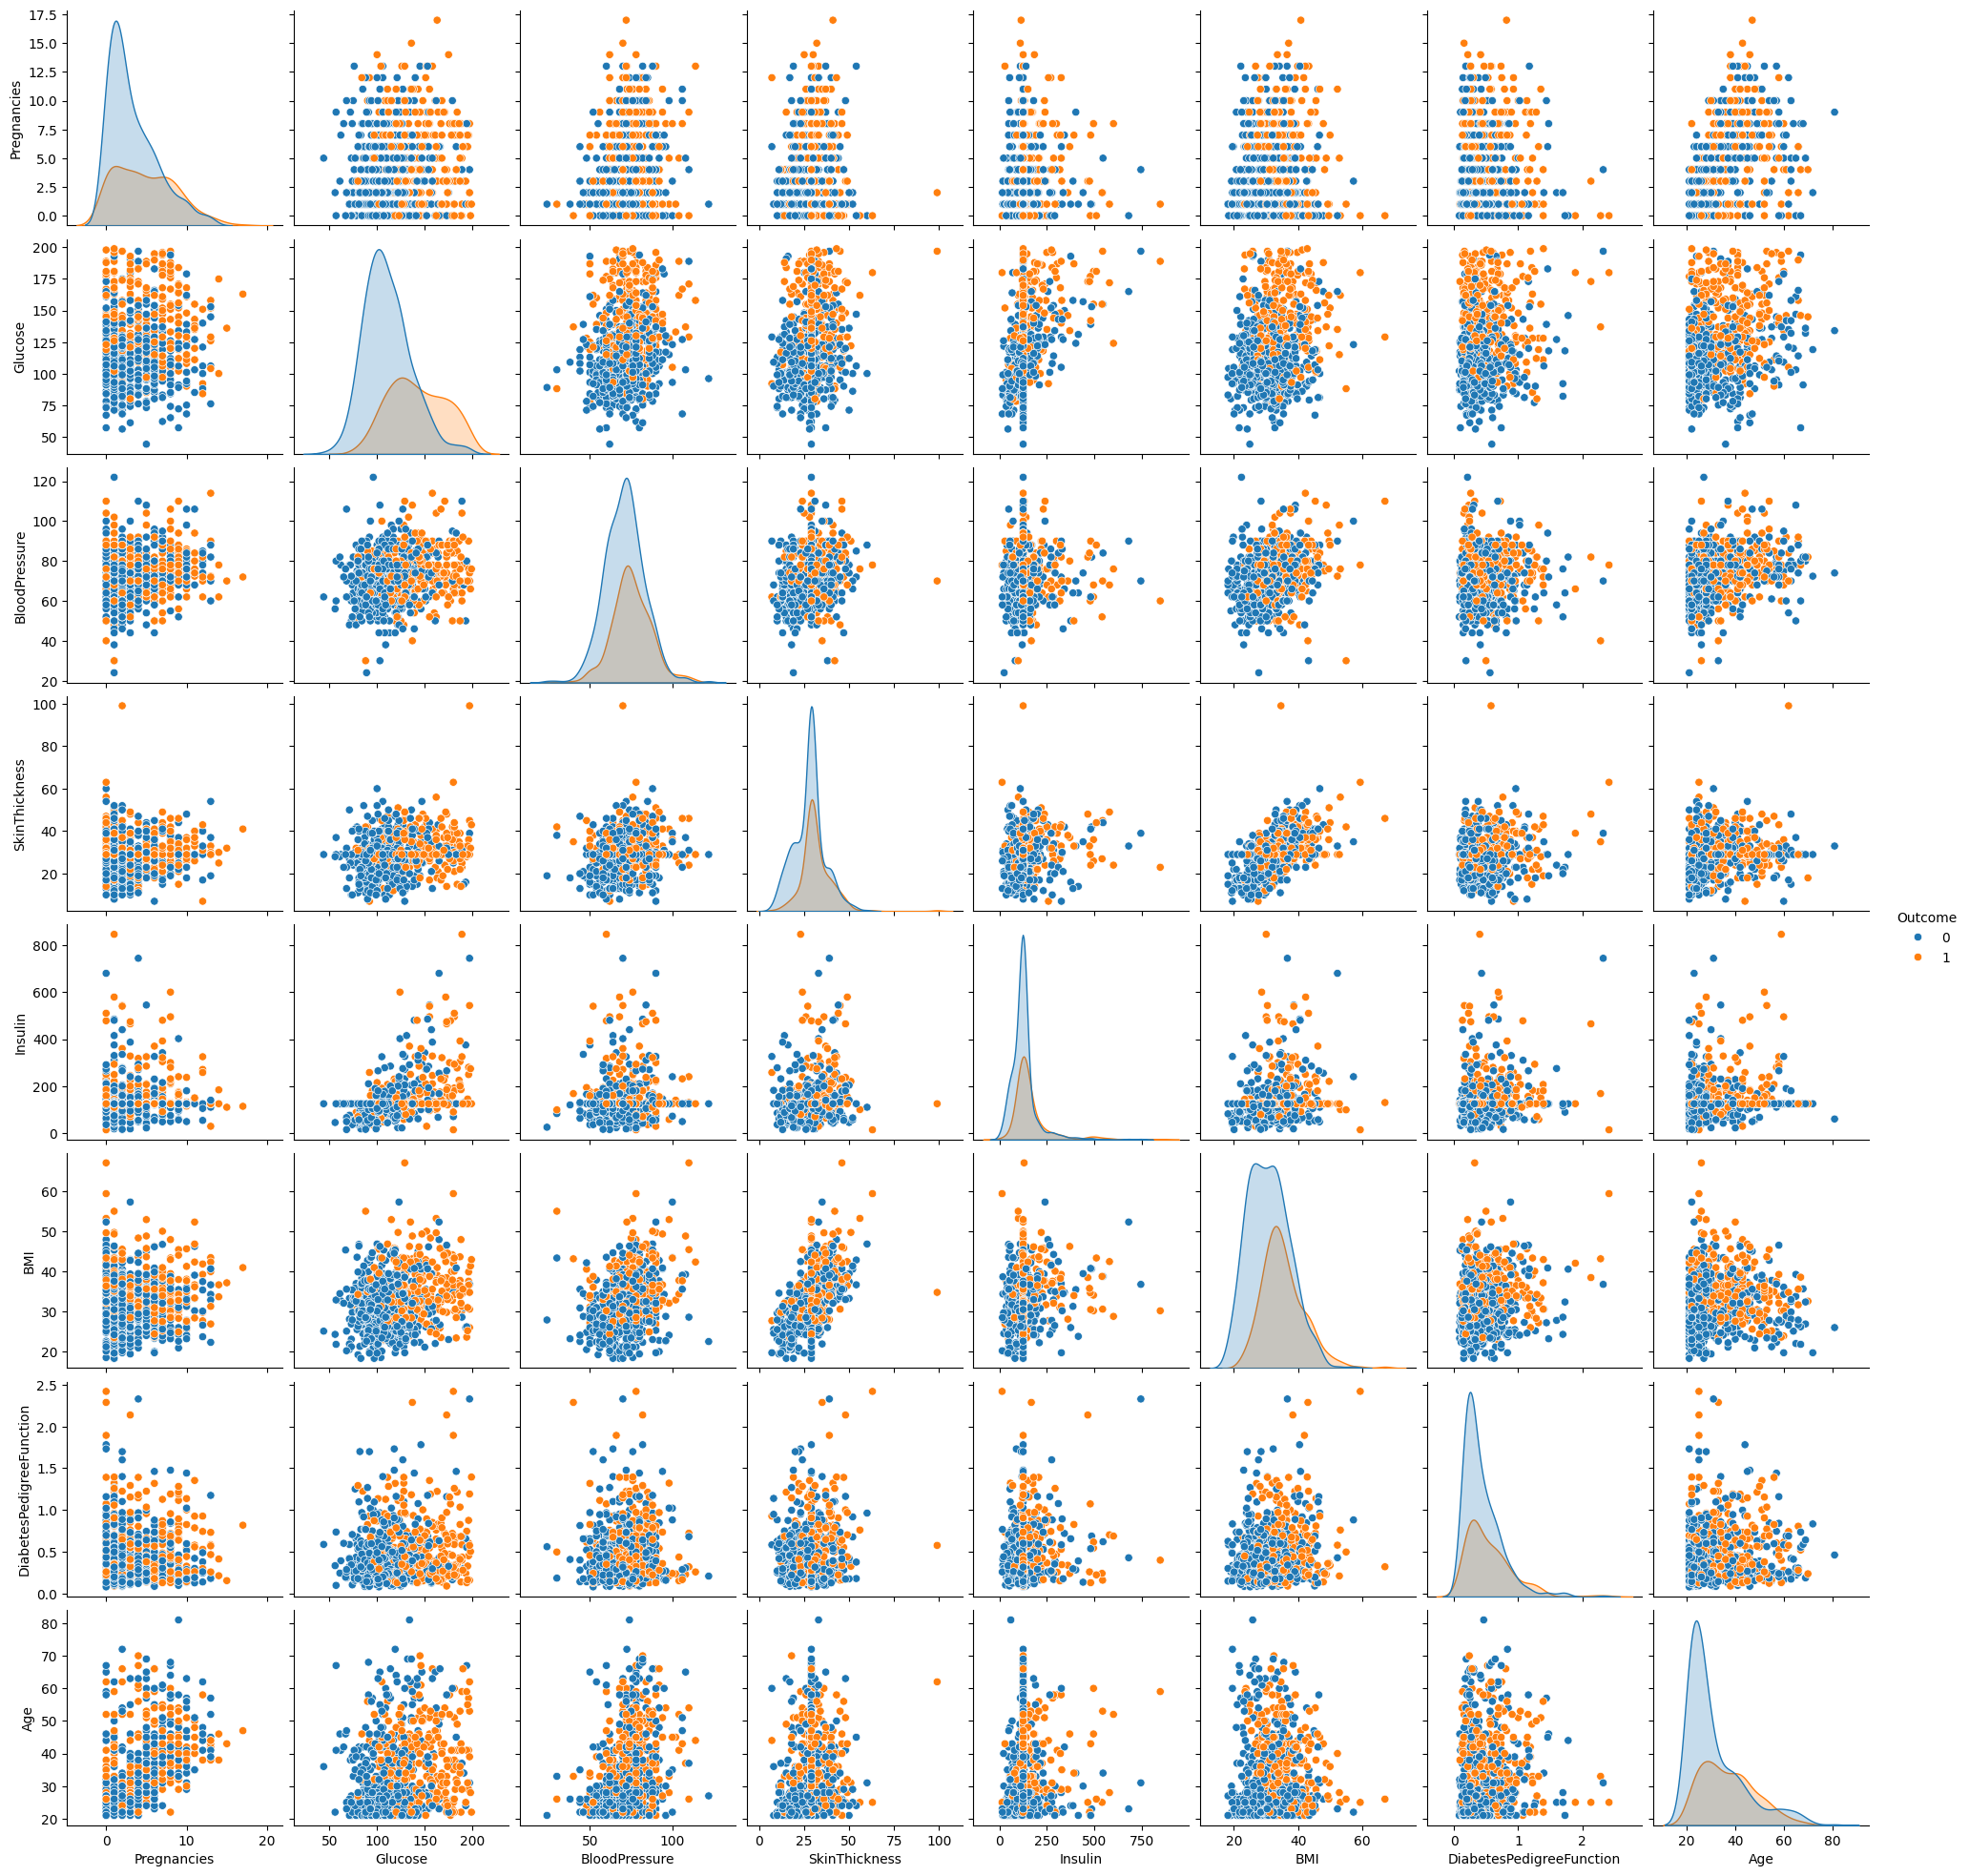

In [43]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Heatmap for unclean data

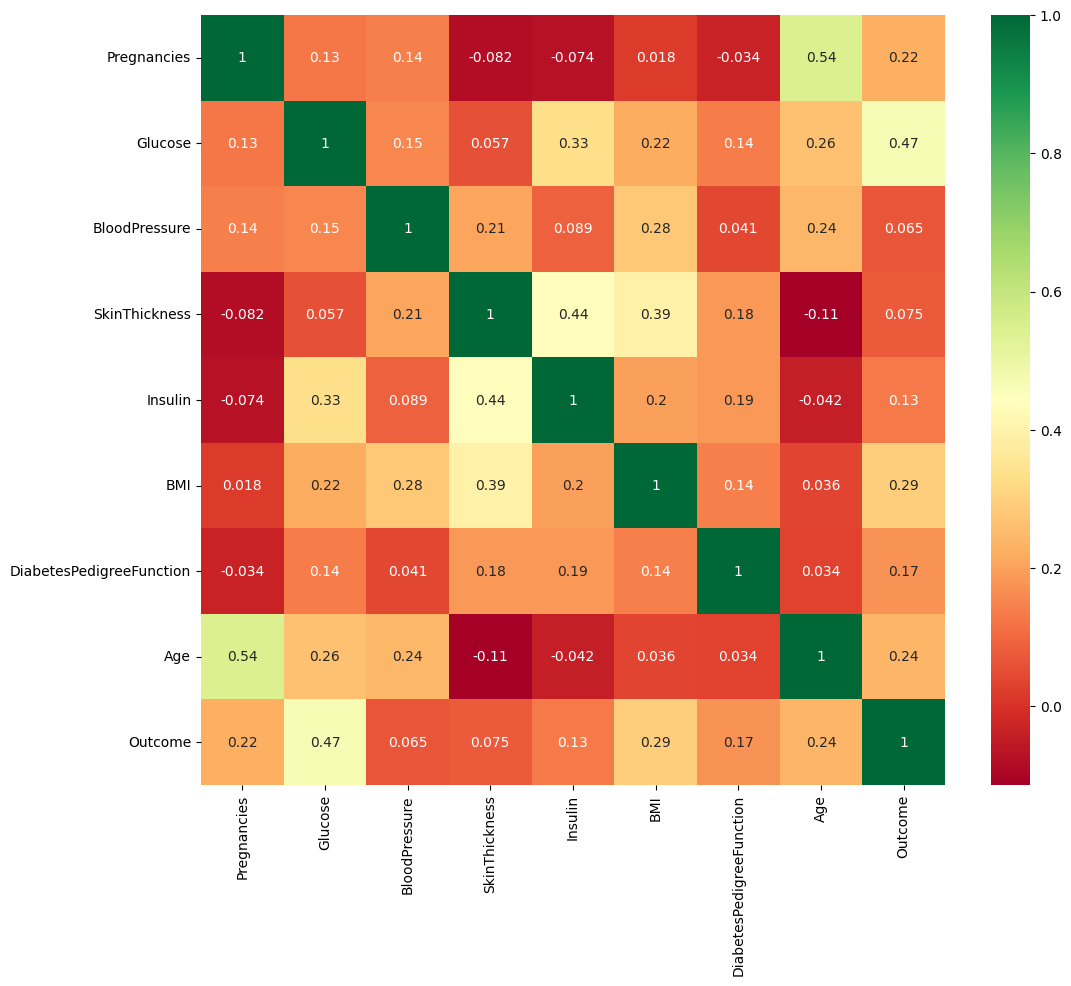

In [44]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Heatmap for clean data

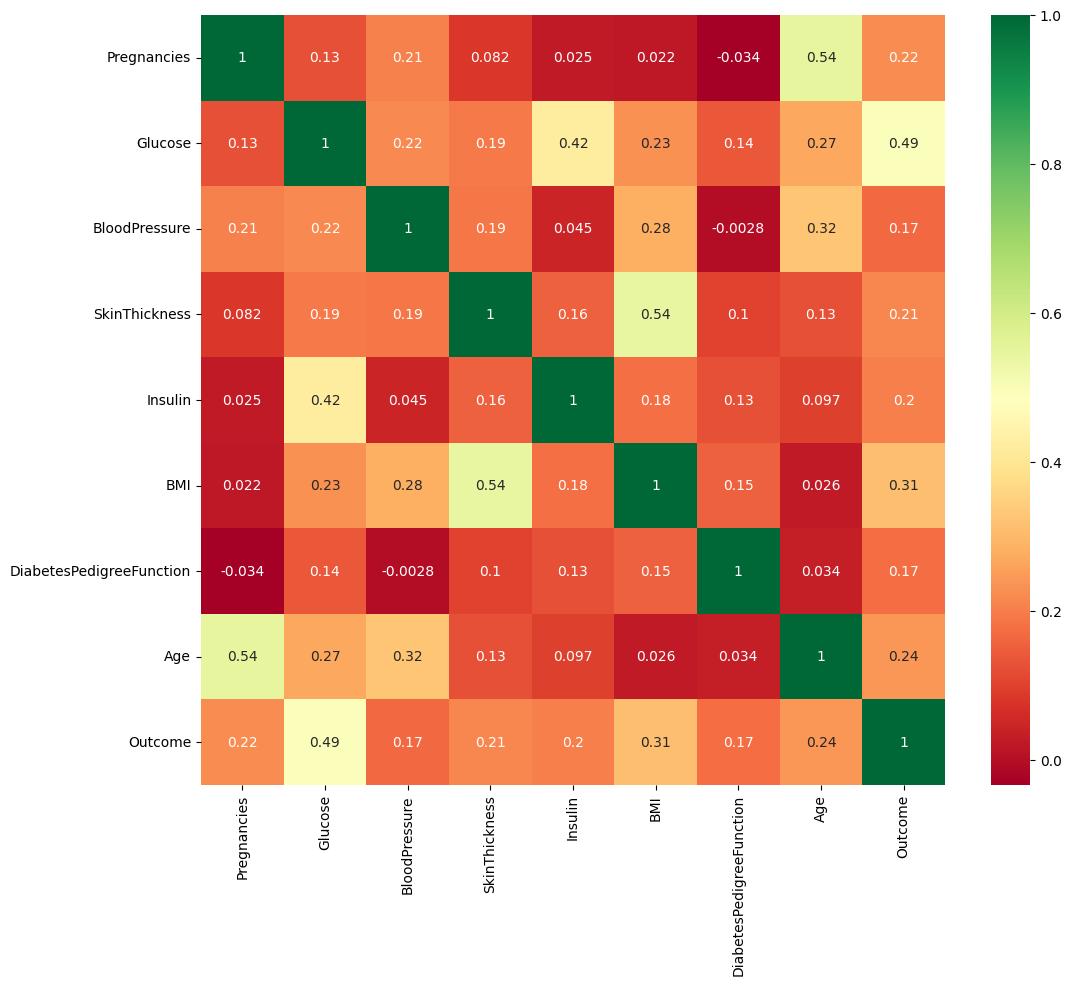

In [45]:
# Plot heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Scaling the data
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


#### to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [48]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape} | Test: {X_test.shape}")
print(f"Class distribution (train): {y_train.value_counts().to_dict()}")

# Cell 7: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled")

# Cell 8: Save Everything for Team
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Save train/test as CSV (with feature names!)
train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
train_df['Outcome'] = y_train.values
train_df.to_csv('../data/processed/train.csv', index=False)

test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
test_df['Outcome'] = y_test.values
test_df.to_csv('../data/processed/test.csv', index=False)

# Save scaler
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save metadata
with open('../data/processed/data_info.txt', 'w') as f:
    f.write(f"Dataset: Pima Indians Diabetes\n")
    f.write(f"Total samples: {len(diabetes_data_copy)}\n")
    f.write(f"Training samples: {len(X_train)}\n")
    f.write(f"Test samples: {len(X_test)}\n")
    f.write(f"Features: {list(X.columns)}\n")
    f.write(f"Target: Outcome (0=No Diabetes, 1=Diabetes)\n")
    f.write(f"Class distribution (train): {y_train.value_counts().to_dict()}\n")
    f.write(f"Class distribution (test): {y_test.value_counts().to_dict()}\n")
    f.write(f"\nData Processing:\n")
    #f.write(f"- Zero values replaced with median for: {zero_not_allowed}\n")
    f.write(f"- Features scaled using StandardScaler\n")
    f.write(f"- Train/test split: 80/20 with stratification\n")
    f.write(f"- Random seed: 42\n")

print("\n" + "="*60)
print("✅ EDA COMPLETE!")
print("="*60)
print("📁 Saved:")
print("   - data/processed/train.csv")
print("   - data/processed/test.csv")
print("   - data/processed/data_info.txt")
print("   - models/scaler.pkl")
print("\n📌 Team: You can now use load_processed_data() in your notebooks!")
print("="*60)

Train: (614, 8) | Test: (154, 8)
Class distribution (train): {0: 400, 1: 214}
✅ Features scaled

✅ EDA COMPLETE!
📁 Saved:
   - data/processed/train.csv
   - data/processed/test.csv
   - data/processed/data_info.txt
   - models/scaler.pkl

📌 Team: You can now use load_processed_data() in your notebooks!
